In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import math

First We need to load the data into a useful structure

In [16]:
base_path = '/home/spencerloggia/Projects/nbk_research/stimuli_recognition/data/'
fname = 'gt.csv'
gt = pd.read_csv(os.path.join(base_path, fname))
gt.describe()

,label
count,512.000000
mean,0.398438
std,0.490055
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Read the image files to np tensor


In [36]:
ims = list()
names = ['image_arrays']
for file in gt['im_path']:
    path = os.path.join(base_path, file)
    im = Image.open(path)
    arr = np.asarray(im, dtype=np.uint8)
    ims.append(arr)
X = np.array(ims, dtype=np.uint8)
y = np.array(gt['label'])
print("x_dim " + str(X.shape))
print("y_dim " + str(y.shape))

x_dim (512, 80, 80)
y_dim (512,)


Transform into frequency domain with harmonics on pi and 0.

In [7]:
#Preprocess
X_trans = X.copy()
from skimage.filters import gabor
import matplotlib.pyplot as plt
for i in range(X.shape[0]):
    _, X_trans[i,:,:] = gabor(X[i,:,:], frequency=.8, theta=math.pi)

In [30]:
X_trans = X.copy()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_trans,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=1018
)

X_real, X_test_real, _, _ = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=1018
)


In [37]:
#no test set
X_train = X_trans.copy()
y_train = y.copy()

1


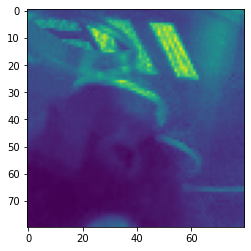

In [38]:
plt.imshow(X_train[200])
print(y_train[200])

1


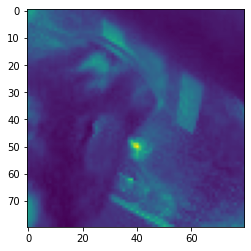

In [39]:
plt.imshow(X_train[160])
print(y_train[160])


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
X_train_flat = X_train.reshape(X_train.shape[0], -1)
clf = GradientBoostingClassifier(n_estimators = 100, random_state=1018)
clf.fit(X_train_flat, y_train)

GradientBoostingClassifier(random_state=1018)

In [34]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_hat = clf.predict(X_test_flat)
bad = np.argwhere(y_hat != y_test)
num_bad = bad.shape[0]
acc = 1 - (num_bad / y_test.shape[0])
print(acc)



0.970873786407767


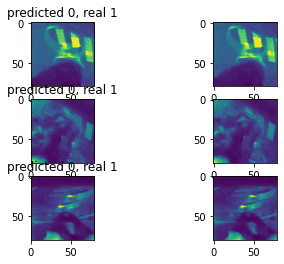

In [35]:
bad = bad.reshape(-1)
fig, axs = plt.subplots(bad.shape[0], 2)
for i in range(bad.shape[0]):
    axs[i, 0].imshow(X_test_real[bad[i]])
    axs[i, 1].imshow(X_test[bad[i]])
    axs[i, 0].set_title("predicted " + str(y_hat[bad[i]]) + ", real " + str(y_test[bad[i]]))
plt.show()

In [41]:
# serialize model
import pickle as pk
file = open('../GBClassifier.pkl', 'wb')
pk.dump(clf, file)
file.close()
